In [1]:
import numpy as np
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import csv, random, pdb, sys
from IPython.core.debugger import set_trace
import copy
import pickle as pkl

In [2]:
sys.path.insert(0, '../lib/')

In [3]:
from util import *
from albemarle import *

In [4]:
graph_file = '../data/household_undirected_albe_1.90.txt'
G, time = read_graph(graph_file)

len(G)

131219

(array([1426776.,  462722.,  508102.,  211800.,   73854.,   83464.,
          35124.,   14580.,   15152.,   14728.]),
 array([ 1.        ,  5.69994444, 10.39988889, 15.09983333, 19.79977778,
        24.49972222, 29.19966667, 33.89961111, 38.59955556, 43.2995    ,
        47.99944444]),
 <a list of 10 Patch objects>)

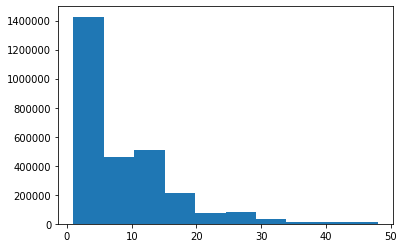

In [5]:
plt.hist(time.values())

(array([131219., 687400., 372122., 237870., 242176., 227290., 172700.,
        456134., 236858., 213752.]),
 array([0.        , 0.09936369, 0.19872739, 0.29809108, 0.39745478,
        0.49681847, 0.59618217, 0.69554586, 0.79490955, 0.89427325,
        0.99363694]),
 <a list of 10 Patch objects>)

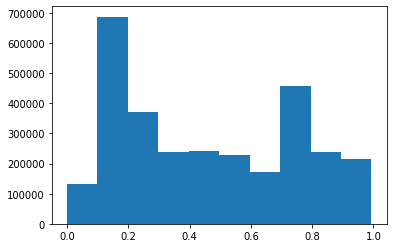

In [28]:
prob = 0.1
def get_infection_probability(G, time):
    p = {}
    n = len(G)
    for u in G.nodes():
        p[u] = 0
        for v in G.neighbors(u):
            p[(u,v)] = p[(v,u)]= 1 - (1-prob)**time[(u,v)]
    return p

p = get_infection_probability(G, time)
plt.hist(p.values())

In [7]:
import pandas as pd

df = pd.read_csv('../data/Albe_demographics.csv')
df['pid'] = df['pid'].astype(str)
attrs = df.set_index('pid').to_dict('index')
nx.set_node_attributes(G, attrs)


In [8]:
hh_size = nx.get_node_attributes(G,'hh_size')
hh_income = nx.get_node_attributes(G,'hh_income')

c = [i for i in hh_income if hh_income[i] == 0]
print(len(c))

for i in hh_income:
    if hh_income[i] < 10000:
        hh_income[i] = 10000

1595


In [9]:
if __name__ == '__main__':
### run for a fixed network and fixed alpha
##########################################

    np.random.seed(0)
    
    T = 10
    epsilon = 0.001
    alphavals = np.arange(1e5,1e6,2*1e5)
    num_times = 10

    n = len(G)
    
    raw_data = []
    exp_inf_list = []
    exp_inf_std = []
    n_vacc_size = []
    xlist_alpha = {}
    ts = {}
    for alpha in alphavals:
        zs = []
        vacc_size = []
        xlist = []
        ts[alpha] = []
        
        print("alpha: ", alpha)

        for i in range(num_times):
            x = {}
            Cvacc = {}
            Cinf = {};
            
            for u in G.nodes():
                x[u] = np.random.randint(0, 2)
                Cinf[u] = 1; 
                Cvacc[u] = Cinf[u]*float(alpha)*hh_size[u]/(n*hh_income[u])
                
            x, nviol, t = best_response_v2(G, Cvacc, Cinf, x, T, p, epsilon)

            if(nviol == 0):
                
                ts[alpha].append(t)
                
                z = exp_infsize(G, x, p)
                zs.append(z)
                
                vaccinated = len([i for i in x if x[i] == 1])
                vacc_size.append(vaccinated)
                xlist.append(x)

        n_vacc_size.append(vacc_size)
        xlist_alpha[alpha] = xlist
        
        zs = np.array(zs)
        exp_inf_list.append(zs.mean())
        exp_inf_std.append(zs.std())
    
    n_vacc_size = np.array(n_vacc_size)



alpha:  100000.0
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
alpha:  300000.0
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected comp

In [11]:
print(exp_inf_list)
print(exp_inf_std)

[0.13836009184207915, 0.40171002464793765, 0.5484587873257343, 0.6431644588932468, 0.7091672837342695]
[0.00036445665530809206, 0.0005945497884643963, 0.0006907802102438216, 0.0005845426952463153, 0.0005354938787311505]


In [12]:
z4 = exp_inf_list
z4std =exp_inf_std

In [ ]:
print(n_vacc_size)

In [16]:
n_num_vacc_list = np.array(n_vacc_size)
vacc_mean = n_num_vacc_list.mean(axis = 1)
vacc_std = n_num_vacc_list.std(axis = 1)

print(list(vacc_mean))
print(list(vacc_std))

[67088.6, 37952.6, 25715.2, 18475.3, 13748.1]
[42.374992625368094, 35.94495792180039, 49.121889214483595, 31.25715917993828, 33.04981089204597]


In [ ]:
vacc_mean = [54875.0, 4234.0, 0.0, 0.0]
vacc_std = [0.0, 0.0, 0.0, 0.0]

In [17]:
k = np.array(vacc_mean).astype(int)
zs, topk_list =  get_topk_exp_infsize(G, k, p) ## sorted by alpha


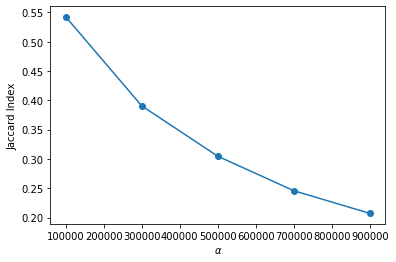

In [18]:
jaccard_mean, jaccard_std = plot_jaccard(alphavals, xlist_alpha, topk_list)

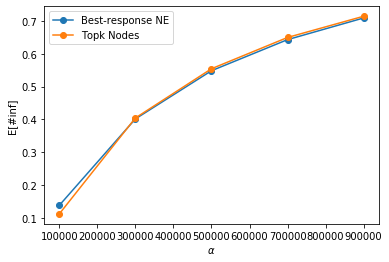

In [19]:
legend = ['Best-response NE', 'Topk Nodes']
plt.plot(alphavals, z4, 'o-')
plt.plot(alphavals, zs, 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.show()

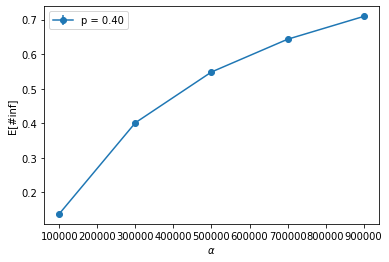

In [20]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.4]]
for y, ystd in zip(z,zstd):
    plt.errorbar(alphavals, y, ystd, fmt = 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.show()

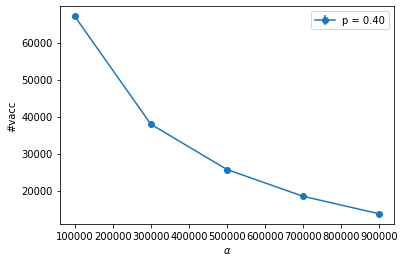

In [21]:
legend = ['p = ' + str('%0.2f'%i) for i in [0.4]]
plt.errorbar(alphavals, vacc_mean, vacc_std, fmt='o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('#vacc')
plt.legend(legend)
plt.show()

In [22]:
max([G.degree(v) for v in G.nodes()])

176

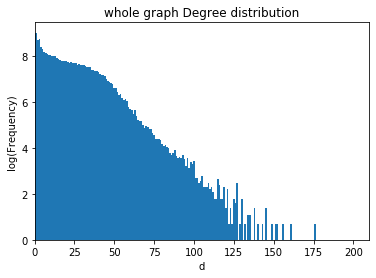

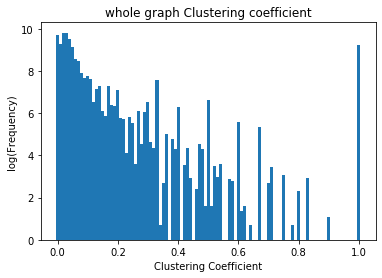

In [23]:
compare_degree(G, 'whole graph')
compare_cc(G, 'whole graph')

In [24]:
def vaccinated_boxplot(attribute_name):
    attribute = nx.get_node_attributes(G, attribute_name)
    data = []
    for alpha in alphavals:
        vaccinated = set()
        for x in xlist_alpha[alpha]:
            for k in x:
                if x[k] == 1:
                    vaccinated.add(k)
        l = [attribute[i] for i in vaccinated]
    
        data.append(l)
        
    data.append(list(attribute.values()))
    labels = list(alphavals)
    labels.append('whole')
    box = plt.boxplot(data, labels=labels)
    plt.xlabel('alpha')
    plt.ylabel(attribute_name)
    plt.savefig('vaccinated nodes-'+attribute_name)
    plt.show()


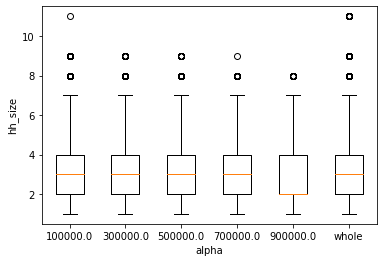

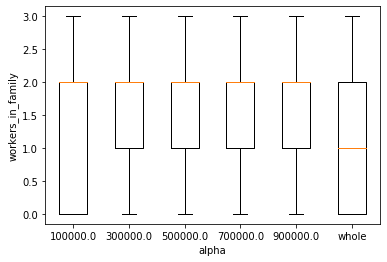

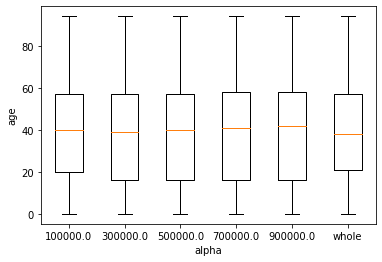

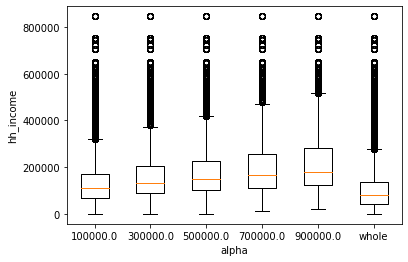

In [25]:
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
vaccinated_boxplot('hh_size')
vaccinated_boxplot('workers_in_family')
vaccinated_boxplot('age')
vaccinated_boxplot('hh_income')

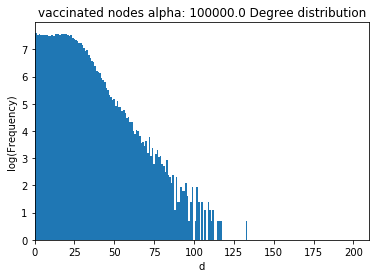

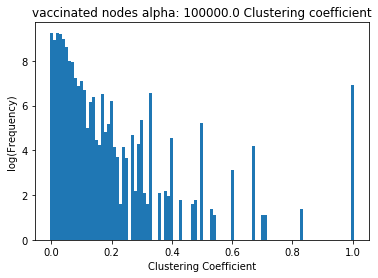

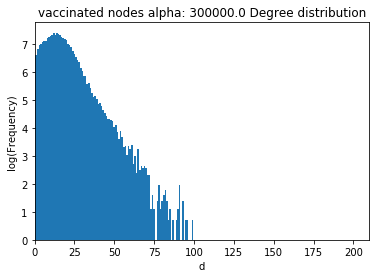

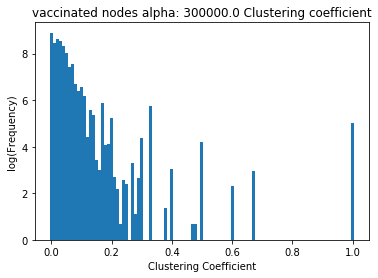

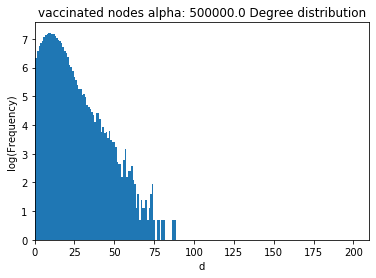

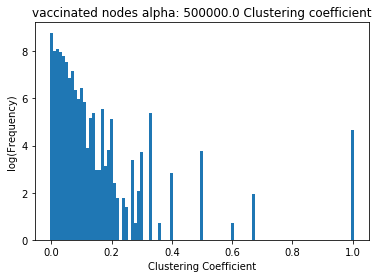

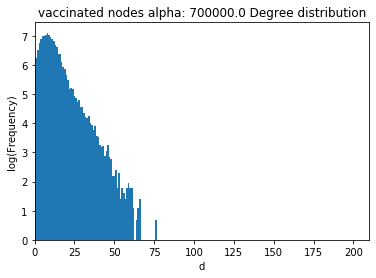

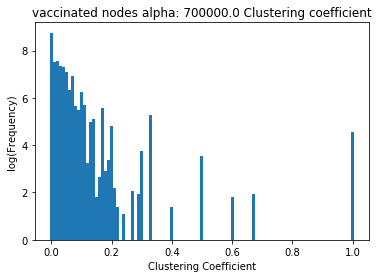

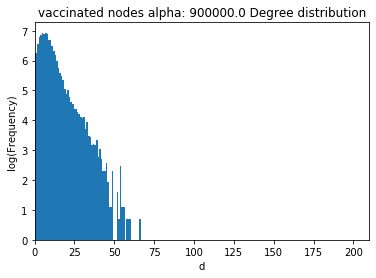

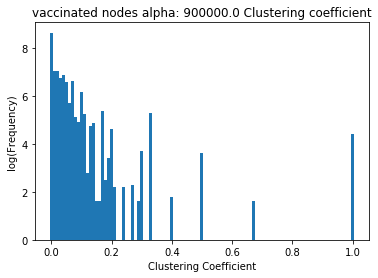

In [26]:
for alpha in alphavals:
    v = set(get_provax(xlist_alpha[alpha][0]))
    s = G.subgraph(v)

    compare_degree(s, 'vaccinated nodes alpha: ' + str(alpha))
    compare_cc(s, 'vaccinated nodes alpha: ' + str(alpha))